In [ ]:
!pip install pyspark

In [ ]:
# 1
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('HandsOnPertemuan9').getOrCreate()
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()

+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



In [ ]:
# 2
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



In [ ]:
# 2 tambahan 1
#rata rata gaji per dptr
spark.sql('''
SELECT DeptId, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY DeptId
''').show()

print("rata-rata gaji per departemen")

+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   2850.0|
|     2|   4100.0|
+------+---------+

rata-rata gaji per departemen


In [ ]:
# 2 tambahan 2
# karyawan yang memiliki gaji diatas rata-rata sesuai dengan gender
spark.sql('''
WITH GenderAverage AS (
    SELECT Gender, AVG(Salary) AS AverageSalary
    FROM employees
    GROUP BY Gender
)
SELECT e.*
FROM employees e
JOIN GenderAverage ga ON e.Gender = ga.Gender
WHERE e.Salary > ga.AverageSalary;
''').show()
print("karyawan dengan gaji di atas rata-rata")

+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
+-----+---+------+------+------+

karyawan dengan gaji di atas rata-rata


In [ ]:
# 2 tambahan 3
# ranking berdasarkan gaji
spark.sql('''
SELECT Name, DeptId, Salary,
       RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees;
''').show()
print("ranking karyawan berdasarkan gaji dalam departemen")

+-----+------+------+----+
| Name|DeptId|Salary|Rank|
+-----+------+------+----+
|James|     1|  3000|   1|
|  Lee|     1|  2700|   2|
| Anna|     2|  4100|   1|
+-----+------+------+----+

ranking karyawan berdasarkan gaji dalam departemen


In [ ]:
# 3
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()

+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



In [ ]:
# 4
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



In [ ]:
# 4 tambahan 5
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT Name, DeptId, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY Name, DeptId
''').show()

+-----+------+---------+
| Name|DeptId|AvgSalary|
+-----+------+---------+
|James|     1|   3000.0|
| Anna|     2|   4100.0|
|  Lee|     1|   2700.0|
+-----+------+---------+



In [ ]:
# 4 tambahan 6
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT Name, Age, DeptId, Salary,
RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees;
''').show()

+-----+---+------+------+----+
| Name|Age|DeptId|Salary|Rank|
+-----+---+------+------+----+
|James| 34|     1|  3000|   1|
|  Lee| 23|     1|  2700|   2|
| Anna| 28|     2|  4100|   1|
+-----+---+------+------+----+



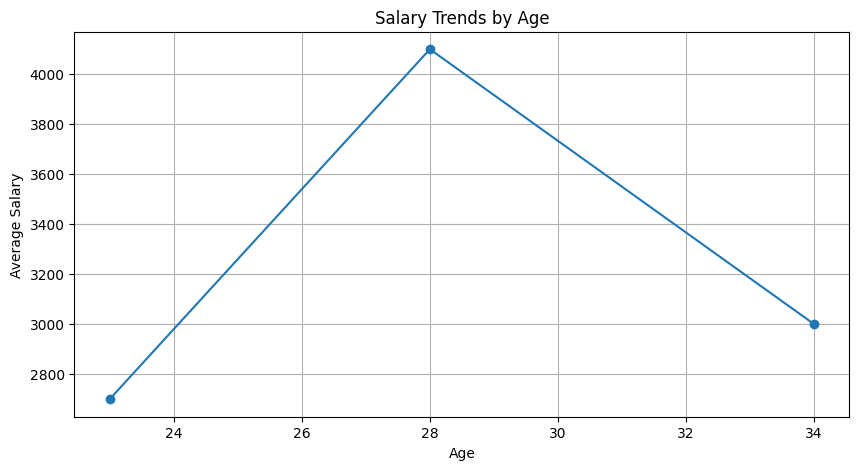

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()

Homework

Text(0.5, 1.0, 'Total Salary and Employee Count per Department')

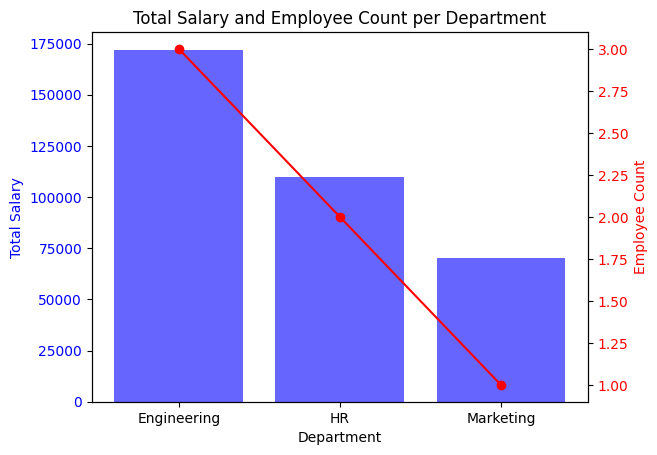

In [ ]:
# 1
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("DepartmentSalary").getOrCreate()

data = [
    ("Alice", "HR", 50000),
    ("Bob", "Engineering", 55000),
    ("Charlie", "HR", 60000),
    ("David", "Engineering", 65000),
    ("Eve", "Marketing", 70000),
    ("Frank", "Engineering", 52000)
]
columns = ["Name", "Department", "Salary"]
employees_df = spark.createDataFrame(data, columns)
employees_df.createOrReplaceTempView("employees")

result_df = spark.sql('''
SELECT Department, SUM(Salary) AS TotalSalary, COUNT(*) AS EmployeeCount
FROM employees
GROUP BY Department
''')

pandas_df = result_df.toPandas()

# membuat bar chart
fig, ax1 = plt.subplots()

ax1.bar(pandas_df['Department'], pandas_df['TotalSalary'], color='b', alpha=0.6, label="Total Salary")
ax1.set_xlabel("Department")
ax1.set_ylabel("Total Salary", color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(pandas_df['Department'], pandas_df['EmployeeCount'], color='r', marker='o', label="Employee Count")
ax2.set_ylabel("Employee Count", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# untuk menambahkan judul
plt.title("Total Salary and Employee Count per Department")

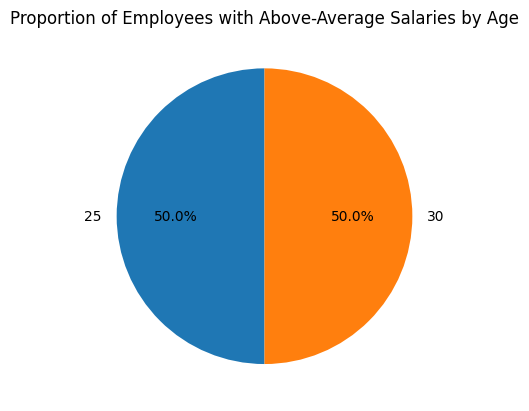

In [ ]:
#2
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Inisialisasi Spark
spark = SparkSession.builder.appName("PieChart").getOrCreate()

# Contoh data (jika Anda sudah punya tabel 'employees' di Spark, lewati langkah ini)
data = [
    ("Alice", 25, 50000),
    ("Bob", 30, 55000),
    ("Charlie", 25, 60000),
    ("David", 35, 65000),
    ("Eve", 30, 70000),
    ("Frank", 25, 52000)
]
columns = ["Name", "Age", "Salary"]
employees_df = spark.createDataFrame(data, columns)
employees_df.createOrReplaceTempView("employees")

# Jalankan query SQL
result_df = spark.sql('''
WITH AvgSalary AS (
    SELECT Age, AVG(Salary) AS AvgSal
    FROM employees
    GROUP BY Age
)
SELECT e.Name, e.Age, e.Salary
FROM employees e
JOIN AvgSalary a ON e.Age = a.Age
WHERE e.Salary > a.AvgSal
''')

# Konversi hasil menjadi Pandas DataFrame untuk visualisasi
pandas_df = result_df.groupBy("Age").count().toPandas()

# Plotting Pie Chart
plt.pie(pandas_df['count'], labels=pandas_df['Age'], autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Employees with Above-Average Salaries by Age")
plt.show()

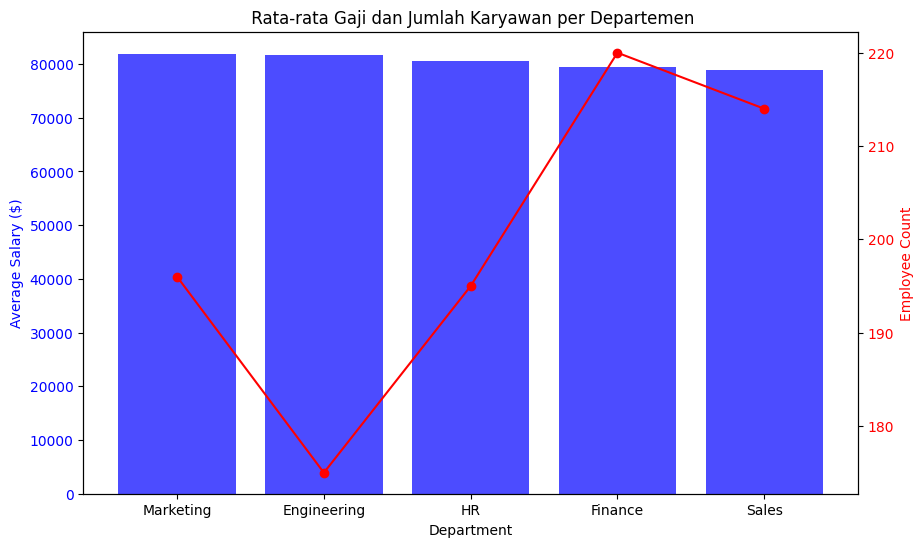

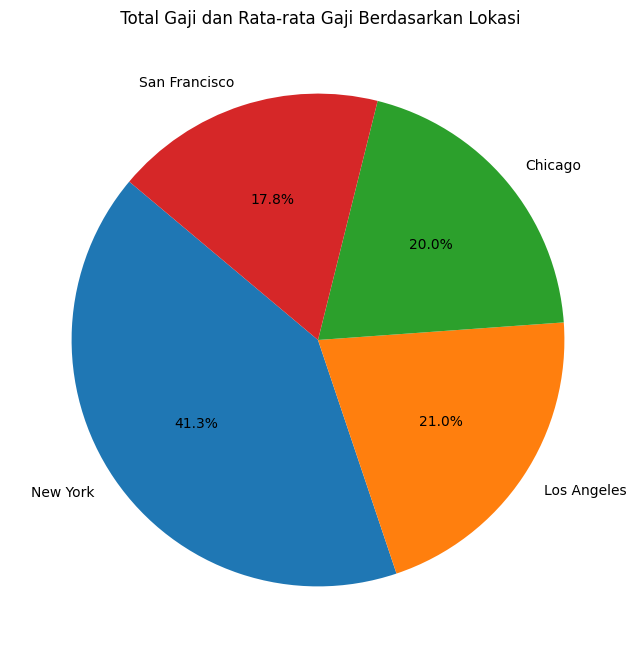

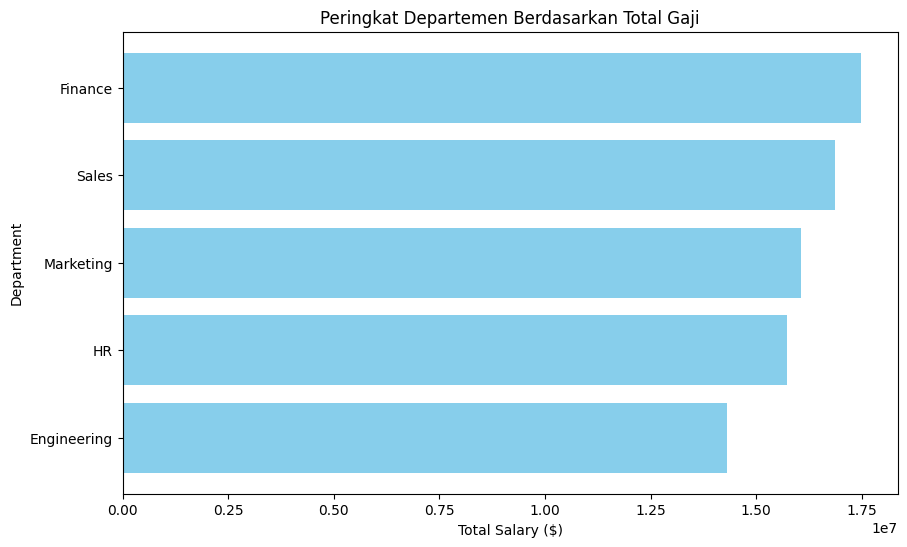

In [ ]:
#3
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("DeepAnalysis").getOrCreate()

np.random.seed(42)

num_records = 1000
employee_data = {
    "EmployeeID": np.arange(1, num_records + 1),
    "Name": ["Employee" + str(i) for i in range(1, num_records + 1)],
    "Age": np.random.randint(22, 60, num_records),
    "Salary": np.random.randint(40000, 120000, num_records),
    "DepartmentID": np.random.randint(1, 6, num_records)
}
employees_df = spark.createDataFrame(pd.DataFrame(employee_data))
employees_df.createOrReplaceTempView("employees")

department_data = {
    "DepartmentID": [1, 2, 3, 4, 5],
    "DepartmentName": ["HR", "Engineering", "Marketing", "Finance", "Sales"],
    "Location": ["New York", "San Francisco", "Chicago", "New York", "Los Angeles"]
}
departments_df = spark.createDataFrame(pd.DataFrame(department_data))
departments_df.createOrReplaceTempView("departments")

# Rata-rata Gaji dan Jumlah Karyawan per Departemen
result_avg_salary = spark.sql('''
SELECT d.DepartmentName, COUNT(e.EmployeeID) AS EmployeeCount, AVG(e.Salary) AS AvgSalary
FROM employees e
JOIN departments d ON e.DepartmentID = d.DepartmentID
GROUP BY d.DepartmentName
ORDER BY AvgSalary DESC
''')

# Total Gaji dan Rata-rata Gaji Berdasarkan Lokasi
result_location_salary = spark.sql('''
SELECT d.Location, SUM(e.Salary) AS TotalSalary, AVG(e.Salary) AS AvgSalary
FROM employees e
JOIN departments d ON e.DepartmentID = d.DepartmentID
GROUP BY d.Location
ORDER BY TotalSalary DESC
''')

# Peringkat Departemen Berdasarkan Total Gaji
result_department_ranking = spark.sql('''
SELECT d.DepartmentName, SUM(e.Salary) AS TotalSalary
FROM employees e
JOIN departments d ON e.DepartmentID = d.DepartmentID
GROUP BY d.DepartmentName
ORDER BY TotalSalary DESC
''')

pandas_df = result_avg_salary.toPandas()
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart untuk Rata-rata Gaji dan Jumlah Karyawan per Departemen
ax1.bar(pandas_df['DepartmentName'], pandas_df['AvgSalary'], color='b', alpha=0.7, label="Average Salary")
ax1.set_xlabel("Department")
ax1.set_ylabel("Average Salary ($)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(pandas_df['DepartmentName'], pandas_df['EmployeeCount'], color='r', marker='o', label="Employee Count")
ax2.set_ylabel("Employee Count", color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title(" Rata-rata Gaji dan Jumlah Karyawan per Departemen")
plt.show()

# pie chart
pandas_location_df = result_location_salary.toPandas()
plt.figure(figsize=(8, 8))
plt.pie(pandas_location_df['TotalSalary'], labels=pandas_location_df['Location'], autopct='%1.1f%%', startangle=140)
plt.title(" Total Gaji dan Rata-rata Gaji Berdasarkan Lokasi")
plt.show()

#chart
pandas_department_ranking = result_department_ranking.toPandas()
plt.figure(figsize=(10, 6))
plt.barh(pandas_department_ranking['DepartmentName'], pandas_department_ranking['TotalSalary'], color='skyblue')
plt.xlabel("Total Salary ($)")
plt.ylabel("Department")
plt.title("Peringkat Departemen Berdasarkan Total Gaji")
plt.gca().invert_yaxis()
plt.show()